In [1]:
# Libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

def generate_dates(num_days):
    """Generate a list of dates starting from today for a given number of days."""
    start_date = datetime.today().replace(hour=0, minute=0, second=0, microsecond=0)
    return [start_date + timedelta(days=i) for i in range(num_days)]

def setup_customers_lanes(num_customers, num_lanes):
    """Create lists of customer names and lanes."""
    customers = [f"Customer {i+1}" for i in range(num_customers)]
    lanes = [f"Lane {i+1}" for i in range(num_lanes)]
    return customers, lanes

def initialize_cost_per_mile(lanes):
    """Initialize a fixed cost per mile for each lane to simulate regional consistency."""
    return {lane: np.random.uniform(1, 3) for lane in lanes}

def initialize_base_mileage(lanes):
    """Initialize a base mileage for each lane."""
    return {lane: np.random.randint(200, 1000) for lane in lanes}

def acceptance_behavior(row):
    """Define specific behaviors for customers"""
    customer = row['Customer Name']
    margin = row['Margin']
    if customer == 'Customer 1':
        # Declines always in Lane 1 and Lane 2
        if row['Lane'] in ['Lane 1', 'Lane 2']:
            return 'Decline'
        else:
            return 'Accept'
    elif customer == 'Customer 2':
        # Declines in every lane
        return 'Decline'
    elif customer == 'Customer 3':
        # Accepts if rate is 5% below market
        return 'Accept' if margin <= -0.05 else 'Decline'
    elif customer == 'Customer 4':
        # Accepts if rate is 10% below market with occasional acceptances
        return 'Accept' if margin <= -0.10 or np.random.rand() < 0.1 else 'Decline'
    elif customer == 'Customer 5':
        # Always accepts
        return 'Accept'
    elif customer == 'Customer 6':
        # Operates only in Lane 3
        return 'Accept' if row['Lane'] == 'Lane 3' else 'Decline'
    elif customer in ['Customer 7', 'Customer 8']:
        # Random acceptance behavior
        return np.random.choice(['Accept', 'Decline'])
    elif customer == 'Customer 9':
        # Accepts if within 2% margin to the market
        return 'Accept' if abs(margin) <= 0.02 else 'Decline'
    elif customer == 'Customer 10':
        # Accepts if offering market rates
        return 'Accept' if abs(margin) < 0.01 else 'Decline'
    else:
        # Default random acceptance for any undefined behavior
        return np.random.choice(['Accept', 'Decline'])
    
def generate_data(date_range, customers, lanes, cost_per_mile_by_lane, base_mileage_by_lane):
    """Generate synthetic dataset with dynamic market rates and perturbed mileage."""
    data = []
    for date in date_range:
        for customer in customers:
            for lane in lanes:
                mileage = base_mileage_by_lane[lane] * (1 + np.random.uniform(-0.10, 0.10))  # Perturbed mileage
                cost_per_mile = cost_per_mile_by_lane[lane]
                fuel_per_mile = np.random.uniform(0.45, 0.8)
                random_effect = np.random.uniform(100, 200)
                market_rate = mileage * (cost_per_mile + fuel_per_mile) + random_effect
                
                # We use triangular distribution to indicate that our business is more likely to offer rates at 4% margin, due to quality of service perception.
                offered_rate_multiplier = np.random.triangular(.9,1.04,1.1)
                offered_rate = market_rate * offered_rate_multiplier
                margin = (offered_rate - market_rate) / market_rate
                data.append({
                    "Date": date,
                    "Customer Name": customer,
                    "Lane": lane,
                    "Market Rate": market_rate,
                    "Offered Rate": offered_rate,
                    "Margin": margin,
                    "Mileage": mileage,
                    "Cost Per Mile": cost_per_mile
                })
    return data

def main():
    
    # Seed for reproducibility
    np.random.seed(42)
    
    # Parameters for time horizon, customer and lane numbers
    num_days = 30
    num_customers = 10
    num_lanes = 10
    
    # Data generation
    date_range = generate_dates(num_days)
    customers, lanes = setup_customers_lanes(num_customers, num_lanes)
    cost_per_mile_by_lane = initialize_cost_per_mile(lanes)
    base_mileage_by_lane = initialize_base_mileage(lanes)
    
    # Create base data
    data = generate_data(date_range, customers, lanes, cost_per_mile_by_lane,base_mileage_by_lane)
    
    # Place data into dataframe for ease of manipulation
    df = pd.DataFrame(data)
    df['Acceptance'] = df.apply(acceptance_behavior, axis=1)
    
    return df

if __name__ == "__main__":
    df = main()

In [4]:
df

,Date,Customer Name,Lane,Market Rate,Offered Rate,Margin,Mileage,Cost Per Mile,Acceptance,Customer_idx,Lane_idx
0,2024-04-20,Customer 1,Lane 1,2114.416829,2093.910801,-0.009698,827.290514,1.749080,0,0,0
1,2024-04-20,Customer 1,Lane 2,1895.183530,1897.613980,0.001282,519.364254,2.901429,0,0,2
2,2024-04-20,Customer 1,Lane 3,3182.765783,3246.402059,0.019994,960.486363,2.463988,1,0,3
3,2024-04-20,Customer 1,Lane 4,1633.807727,1583.321477,-0.030901,553.036222,2.197317,1,0,4
4,2024-04-20,Customer 1,Lane 5,1517.740015,1596.737919,0.052050,630.890130,1.312037,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...
2995,2024-05-19,Customer 10,Lane 6,1425.542324,1417.280444,-0.005796,658.811777,1.311989,1,1,6
2996,2024-05-19,Customer 10,Lane 7,1085.608521,1137.594191,0.047886,603.053840,1.116167,0,1,7
2997,2024-05-19,Customer 10,Lane 8,1522.034791,1614.079345,0.060475,393.243234,2.732352,0,1,8
2998,2024-05-19,Customer 10,Lane 9,1607.033823,1600.604246,-0.004001,471.140558,2.202230,1,1,9


In [2]:
# Libraries
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import time
import pymc.sampling_jax

# Prepare data
df['Acceptance'] = df['Acceptance'].apply(lambda x: 1 if x == 'Accept' else 0)
customer_encoder = LabelEncoder()
lane_encoder = LabelEncoder()

df['Customer_idx'] = customer_encoder.fit_transform(df['Customer Name'])
df['Lane_idx'] = lane_encoder.fit_transform(df['Lane'])

# Model definition
coords = {
    "customer": customer_encoder.classes_,
    "lane": lane_encoder.classes_
}

# Calculate time to run
t1 = time.time()

with pm.Model(coords=coords) as model2:
    # Group hyperpriors for intercepts
    mu_customer = pm.Normal("mu_customer", mu=0, sigma=1)
    sigma_customer = pm.HalfNormal("sigma_customer", sigma=1)
    mu_lane = pm.Normal("mu_lane", mu=0, sigma=1)
    sigma_lane = pm.HalfNormal("sigma_lane", sigma=1)

    # Group intercepts
    customer_intercept = pm.Normal("customer_intercept", mu=mu_customer, sigma=sigma_customer, dims="customer")
    lane_intercept = pm.Normal("lane_intercept", mu=mu_lane, sigma=sigma_lane, dims="lane")

    # Coefficients for margin
    beta_margin = pm.Normal("beta_margin", mu=0, sigma=1)

    # Interaction effects
    mu_interaction = pm.Normal("mu_interaction", mu=0, sigma=1)
    sigma_interaction = pm.HalfNormal("sigma_interaction", sigma=1)
    interaction_effects = pm.Normal("interaction_effects", mu=mu_interaction, sigma=sigma_interaction, dims=("customer", "lane"))

    # Model likelihood
    odds = (customer_intercept[df['Customer_idx']] +
            lane_intercept[df['Lane_idx']] +
            beta_margin * df['Margin'] +
            interaction_effects[df['Customer_idx'], df['Lane_idx']])
    likelihood = pm.Bernoulli("likelihood", logit_p=odds, observed=df['Acceptance'])

    # Model fitting
    trace2 = pm.sampling_jax.sample_numpyro_nuts(draws=1000, tune=2000, chains=4, target_accept=0.95, idata_kwargs={'log_likelihood': True})
    
print(f'The time it took to run the model was: {time.time() - t1}')
# Model evaluation
waic = az.waic(trace2)


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\Users\taylo\Documents\study\OMSA\isye6420\isye6420\Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Compiling.. :   0%|          | 0/3000 [00:00<?, ?it/s]








Running chain 0:   0%|          | 0/3000 [00:02<?, ?it/s]


Running chain 0:   5%|▌         | 150/3000 [00:07<01:33, 30.42it/s]


Running chain 0:  10%|█         | 300/3000 [00:10<01:13, 36.55it/s]


Running chain 0:  15%|█▌        | 450/3000 [00:14<01:04, 39.73it/s]


Running chain 0:  20%|██        | 600/3000 [00:18<01:01, 39.25it/s]


Running chain 0:  25%|██▌       | 750/3000 [00:21<00:54, 40.95it/s]


Running chain 0:  30%|███       | 900/3000 [00:24<00:49, 42.40it/s]


Running chain 0:  35%|███▌      | 1050/3000 [00:28<00:46, 42.36it/s]


Runn

The time it took to run the model was: 89.2538514137268


c:\Users\taylo\Documents\study\OMSA\isye6420\isye6420\Project\.venv\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [10]:
az.waic(trace2)

c:\Users\taylo\Documents\study\OMSA\isye6420\isye6420\Project\.venv\Lib\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 4000 posterior samples and 3000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -964.98    27.61
p_waic       59.02        -

There has been a warning during the calculation. Please check the results.

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

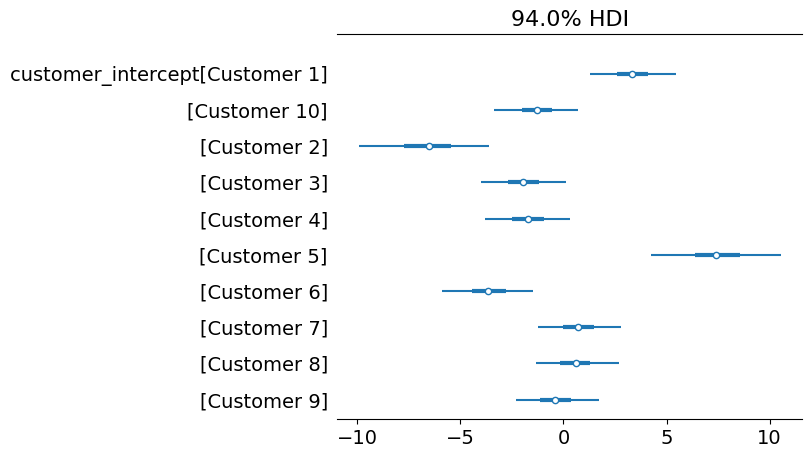

In [12]:
# Visualizations
az.plot_forest(trace2, var_names=["customer_intercept"], combined=True)


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

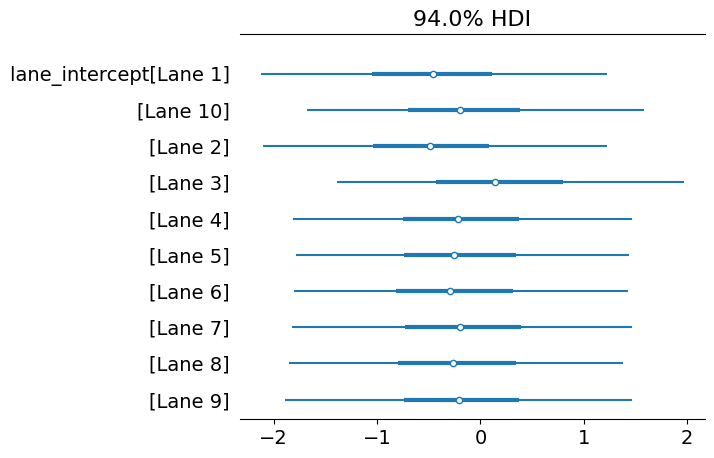

In [13]:
# Visualizations
az.plot_forest(trace2, var_names=["lane_intercept"], combined=True)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

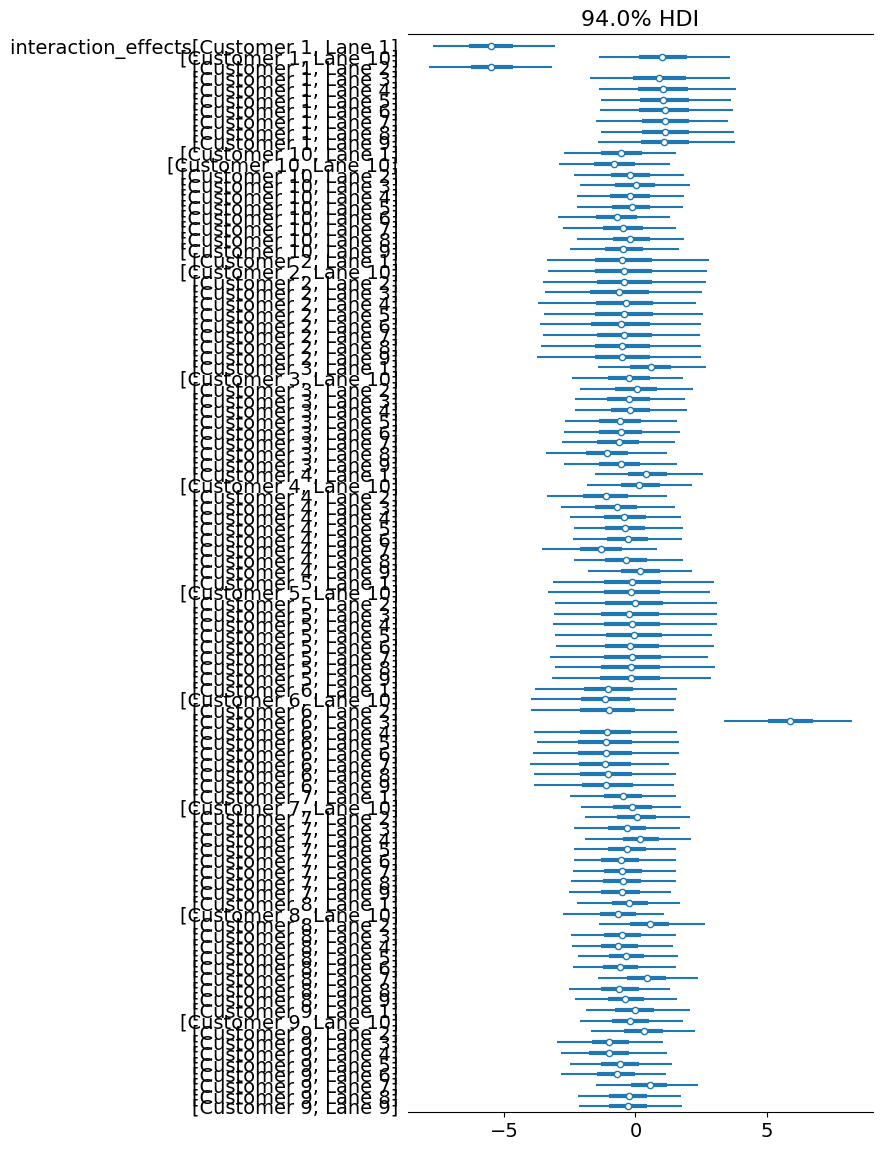

In [14]:
az.plot_forest(trace2, var_names=["interaction_effects"], combined=True)

In [25]:
# Frequentist Logistic Regression

# Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# one-hot encode the customer and lane
one_hot_df = pd.get_dummies(df,['Customer Name','Lane'])
one_hot_df = one_hot_df.drop(columns=['Customer_idx','Lane_idx'])

# Create X and y
X = one_hot_df.drop(columns=['Acceptance','Date'])
y = one_hot_df['Acceptance']

# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

# Create pipeline for easily reproducible work
pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('logistic',LogisticRegression(random_state=42))
])

# Fit the pipe
pipe.fit(X_train,y_train)

# Prediction
y_pred = pipe.predict(X_test)

# Error metrics
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f'The confusion matrix is: {cm}')
print(f'The confusion report is: {cr}')




The confusion matrix is: [[404  69]
 [ 91 186]]
The confusion report is:               precision    recall  f1-score   support

           0       0.82      0.85      0.83       473
           1       0.73      0.67      0.70       277

    accuracy                           0.79       750
   macro avg       0.77      0.76      0.77       750
weighted avg       0.78      0.79      0.78       750

